### Live Session Hands On Feature Engineering - Nia from Intellipaat


> ```
> import libraries -> load data -> EDA ->
> feature engineering -> feature selection ->
> model selection -> model evaluation -> hyperparameter tuning ->
> deploy model
> ```


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_csv('../data/vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### EDA


In [5]:
# check columns
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.shape

(16598, 11)

In [7]:
# recommended info as it gives more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
# filling missing/null values
df['Year'].fillna(df['Year'].median(), inplace=True)

In [10]:
# filling missing/null values
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

In [11]:
df['Publisher'].mode()

0    Electronic Arts
Name: Publisher, dtype: object

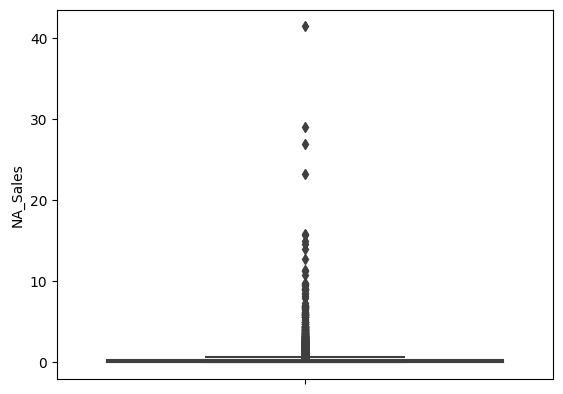

In [12]:
# to find out outlier
sns.boxplot(data=df, y='NA_Sales')
plt.show()

In [13]:
# converting data type
df['Year'] = df['Year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


### LabelEncoding


In [17]:
from sklearn.preprocessing import LabelEncoder
e = df.copy()

# creating instance for labelencoder
le = LabelEncoder()

for c in e.columns:
    # find all object columns as le will be performed on obj data
    if e[c].dtype == 'object':
        e[c] = le.fit_transform(e[c])

e

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,11101,6,2002,4,269,0.01,0.00,0.00,0.00,0.01
16594,16597,5796,7,2003,8,241,0.01,0.00,0.00,0.00,0.01
16595,16598,8144,16,2008,6,21,0.00,0.00,0.00,0.00,0.01
16596,16599,5014,4,2010,5,8,0.00,0.01,0.00,0.00,0.01


### Dummy Encoding


In [19]:
d = df.copy()
d = pd.get_dummies(d, d.select_dtypes(include='object').columns)
d.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,2006,41.49,29.02,3.77,8.46,82.74,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1985,29.08,3.58,6.81,0.77,40.24,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2008,15.85,12.88,3.79,3.31,35.82,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2009,15.75,11.01,3.28,2.96,33.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1996,11.27,8.89,10.22,1.00,31.37,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### One Hot Encoding


In [23]:
from sklearn.preprocessing import OneHotEncoder
f=df.copy()
object_columns = f.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(f[object_columns])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(object_columns))
data_encoded = f.drop(object_columns, axis=1)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)
data_encoded

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,2006,41.49,29.02,3.77,8.46,82.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1985,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2008,15.85,12.88,3.79,3.31,35.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2009,15.75,11.01,3.28,2.96,33.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1996,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,16597,2003,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,16598,2008,0.00,0.00,0.00,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16596,16599,2010,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
